In [30]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv("/content/required_csv.csv")

#show the dataset
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [32]:
df.shape

(4431, 7)

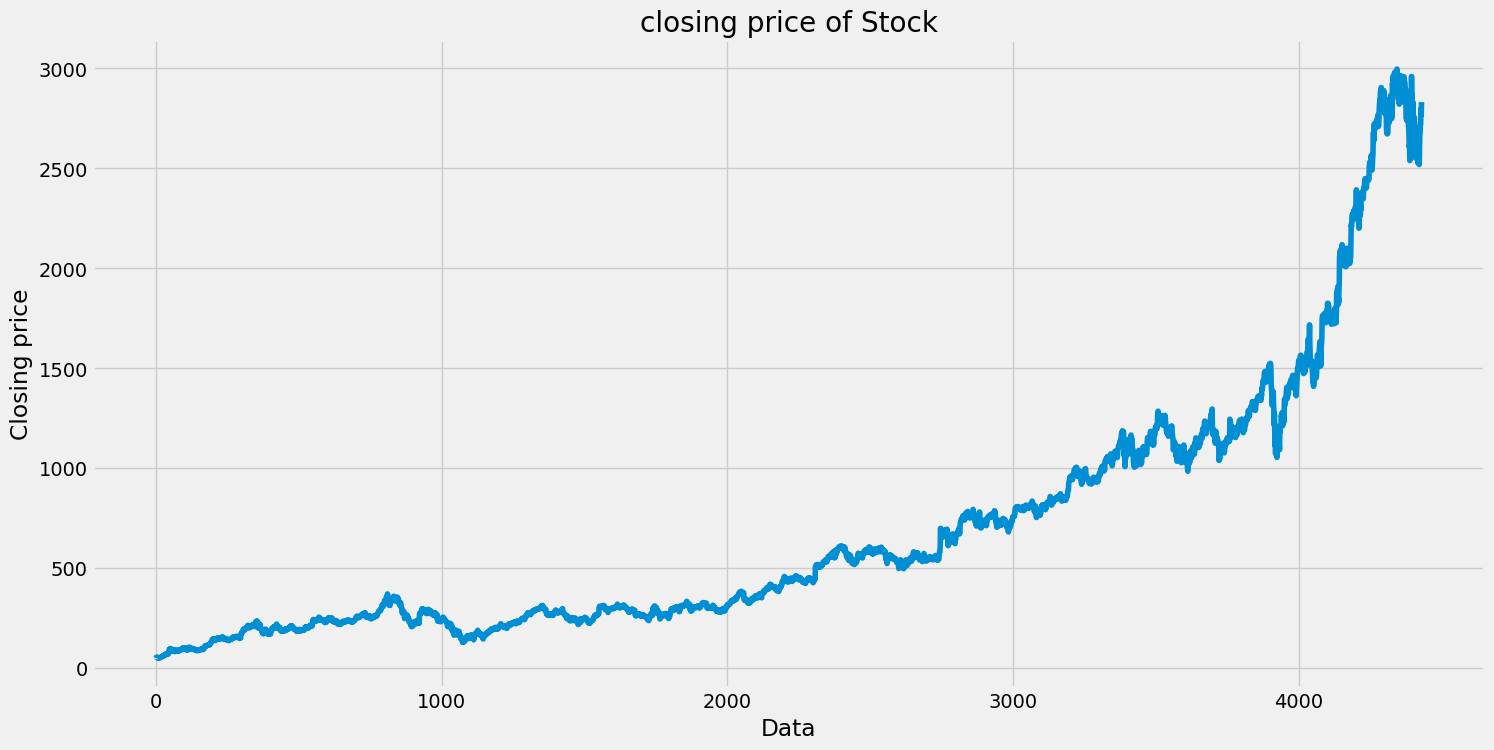

In [33]:
#visualize the closing prices
plt.figure(figsize=(16,8))
plt.title('closing price of Stock')
plt.plot(df["Close"])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

In [34]:
#create new database with only required coloumns
data=df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

3545

In [35]:
#scale the data
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  1.0262860548103456e-16
Standard deviation of processed data:  1.0


In [36]:
scaled_data

array([[-0.99653108],
       [-0.99034771],
       [-0.98950205],
       ...,
       [ 3.26184129],
       [ 3.2124701 ],
       [ 3.31466883]])

In [37]:
# if True in df['Close'].isna():
#   print('existential crisis')

In [38]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i])
  y_train.append(train_data[i])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [39]:
import numpy as np
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (3485, 60, 1)
x_train shape after reshaping (3485, 60, 1)


In [40]:
len(x_train[0])

60

In [41]:
#build LSTM model
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

In [42]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60, 200)           161600    
                                                                 
 lstm_6 (LSTM)               (None, 200)               320800    
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507601 (1.94 MB)
Trainable params: 507601 (1.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
#train the model
history = model.fit(x_train,y_train,epochs=20)

Epoch 1/20
109/109 [==============================] - 21s 163ms/step - loss: 0.0074
Epoch 2/20
109/109 [==============================] - 17s 158ms/step - loss: 6.2214e-04
Epoch 3/20
109/109 [==============================] - 18s 162ms/step - loss: 5.9393e-04
Epoch 4/20
109/109 [==============================] - 18s 161ms/step - loss: 6.1443e-04
Epoch 5/20
109/109 [==============================] - 18s 163ms/step - loss: 5.2398e-04
Epoch 6/20
109/109 [==============================] - 17s 157ms/step - loss: 4.9694e-04
Epoch 7/20
109/109 [==============================] - 18s 164ms/step - loss: 5.1968e-04
Epoch 8/20
109/109 [==============================] - 17s 158ms/step - loss: 5.2864e-04
Epoch 9/20
109/109 [==============================] - 17s 159ms/step - loss: 4.5471e-04
Epoch 10/20
109/109 [==============================] - 18s 164ms/step - loss: 3.7757e-04
Epoch 11/20
109/109 [==============================] - 17s 157ms/step - loss: 3.5887e-04
Epoch 12/20
109/109 [=============

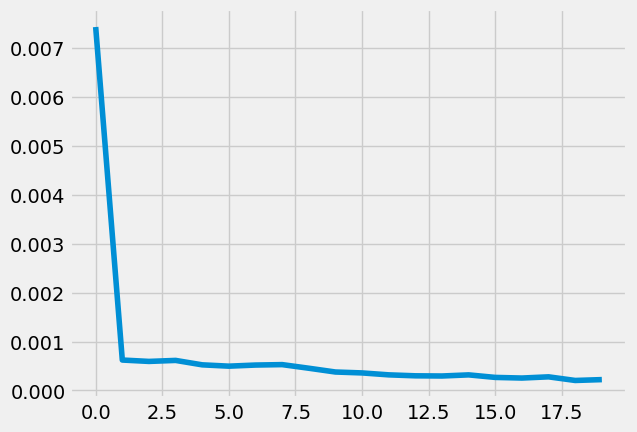

In [45]:
plt.plot(history.history['loss'])

In [46]:
# import keras
# model=keras.Sequential()
# model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
# model.add(LSTM(50,return_sequences=True))
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')
# model.fit(x_train,y_train,epochs=1,batch_size=64,verbose=1)

In [47]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-60:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [48]:
#convert the data to numpy
x_test=np.array(x_test)

In [49]:
#reshape the data

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [50]:
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

28/28 [==============================] - 2s 51ms/step
[[1161.2892 ]
 [1160.8295 ]
 [1168.6558 ]
 [1185.3541 ]
 [1174.5043 ]
 [1172.8947 ]
 [1184.355  ]
 [1188.6177 ]
 [1198.5071 ]
 [1200.4464 ]
 [1200.0645 ]
 [1198.374  ]
 [1200.8308 ]
 [1174.9442 ]
 [1158.9602 ]
 [1149.2179 ]
 [1141.9135 ]
 [1101.6652 ]
 [1088.5167 ]
 [1114.1342 ]
 [1113.905  ]
 [1133.2742 ]
 [1134.7009 ]
 [1107.0524 ]
 [1099.7654 ]
 [1105.1908 ]
 [1111.5507 ]
 [1069.2623 ]
 [1087.3693 ]
 [1086.5553 ]
 [1047.3625 ]
 [1043.4149 ]
 [1079.5342 ]
 [1092.415  ]
 [1080.1492 ]
 [1059.2932 ]
 [1061.992  ]
 [1095.5099 ]
 [1098.3687 ]
 [1079.9412 ]
 [1050.0404 ]
 [1040.0603 ]
 [1047.1179 ]
 [1065.8839 ]
 [1071.3082 ]
 [1039.462  ]
 [1027.2667 ]
 [1036.9161 ]
 [1033.8376 ]
 [1050.8281 ]
 [1055.2714 ]
 [1083.2323 ]
 [1094.4728 ]
 [1104.0078 ]
 [1108.8735 ]
 [1066.5507 ]
 [1060.9033 ]
 [1042.7231 ]
 [1044.0924 ]
 [1056.2485 ]
 [1071.8125 ]
 [1076.3632 ]
 [1058.3527 ]
 [1029.7458 ]
 [1033.9911 ]
 [1035.1718 ]
 [1027.2863 ]
 [1000.3

In [51]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

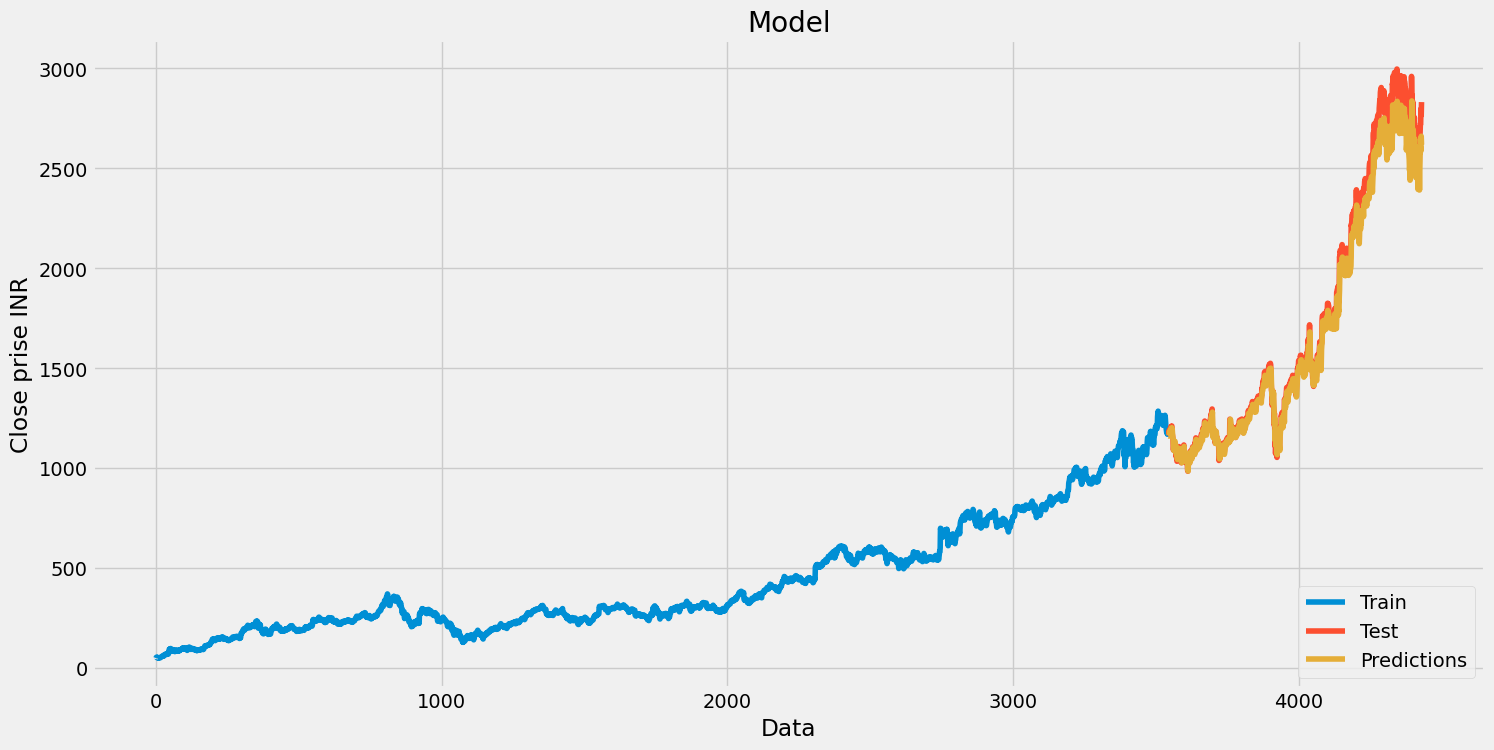

In [52]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Close prise INR')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Test','Predictions'],loc='lower right')
plt.show()

In [53]:
#show the valid and predicted value
valid

,Close,Predictions
3545,1167.109985,1161.289185
3546,1174.270020,1160.829468
3547,1191.569946,1168.655762
3548,1172.119995,1185.354126
3549,1179.560059,1174.504272
...,...,...
4426,2722.510010,2579.186768
4427,2722.030029,2604.091797
4428,2797.360107,2589.293701
4429,2765.510010,2660.664551
